# *Manipulación y Análisis de Datos con Python* 
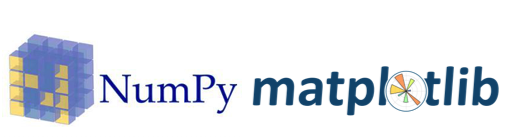

<br>
## Pre-procesamiento de datos

<br>
### Manejo de datos faltantes

In [68]:
datos1 = pd.DataFrame([24, np.nan, np.nan, 23,np.nan, 12, np.nan, 17, np.nan, 2 ,5], columns = list('A'))
datos1

,A
0,24.0
1,NaN
2,NaN
3,23.0
4,NaN
5,12.0
6,NaN
7,17.0
8,NaN
9,2.0


<br>
En `dropna()` el argumento `subset` considera la etiqueta para seleccionar el conjunto a descartar, `axis=0` descarta filas (`axis=1` columnas) y `inplace= True` hace que los cambios se ejecuten directamente en `DataFrame`.

In [62]:
datos1.dropna(subset=['A'], axis= 0, inplace= True)
datos1

,A
0,24.0
3,23.0
5,12.0
7,17.0
9,2.0
10,5.0


<br> 
La función `replace()` permite reemplazar valores faltantes en el `DataFrame` por valores nuevos. En nuestro ejemplo, reemplazaremos con el promedio, que se calcula con la función `mean()`. 

In [63]:
datos1 = pd.DataFrame([24, np.nan, np.nan, 23,np.nan, 12, np.nan, 17, np.nan, 2 ,5], columns = list('A'))
media = datos1['A'].mean()
media

13.833333333333334

<br>
Ahora usamos la función `replace()`

In [23]:
datos1['A'].replace(np.nan, media, inplace = True)
datos1

,A
0,24.000000
1,13.833333
2,13.833333
3,23.000000
4,13.833333
5,12.000000
6,13.833333
7,17.000000
8,13.833333
9,2.000000


<br>
## Transformando los datos

<br>
### Mezclando y combinando `DataFrames`

In [70]:
import pandas as pd

compra_1 = pd.Series({'Nombre': 'Adelis',
                        'Artículo comprado': 'Libro',
                        'Costo': 1200})
compra_2 = pd.Series({'Nombre': 'Miguel',
                        'Artículo comprado': 'Raspberry pi 3',
                        'Costo': 15000})
compra_3 = pd.Series({'Nombre': 'Jaime',
                        'Artículo comprado': 'Balón',
                        'Costo': 5000})
df = pd.DataFrame([compra_1, compra_2, compra_3], index=['Tienda 1', 'Tienda 1', 'Tienda 2'])
df

,Artículo comprado,Costo,Nombre
Tienda 1,Libro,1200,Adelis
Tienda 1,Raspberry pi 3,15000,Miguel
Tienda 2,Balón,5000,Jaime


<br>
Podemos agregar elementos al `DataFrame` de la siguiente manera:

In [71]:
df['Fecha'] = ['Diciembre 1', 'Febrero 4', 'Mediados de Julio']
df

,Artículo comprado,Costo,Nombre,Fecha
Tienda 1,Libro,1200,Adelis,Diciembre 1
Tienda 1,Raspberry pi 3,15000,Miguel,Febrero 4
Tienda 2,Balón,5000,Jaime,Mediados de Julio


In [72]:
df['Entregado'] = 'Sí'
df

,Artículo comprado,Costo,Nombre,Fecha,Entregado
Tienda 1,Libro,1200,Adelis,Diciembre 1,Sí
Tienda 1,Raspberry pi 3,15000,Miguel,Febrero 4,Sí
Tienda 2,Balón,5000,Jaime,Mediados de Julio,Sí


In [73]:
df['Retroalimentación'] = ['Positiva', None, 'Negativa']
df

,Artículo comprado,Costo,Nombre,Fecha,Entregado,Retroalimentación
Tienda 1,Libro,1200,Adelis,Diciembre 1,Sí,Positiva
Tienda 1,Raspberry pi 3,15000,Miguel,Febrero 4,Sí,None
Tienda 2,Balón,5000,Jaime,Mediados de Julio,Sí,Negativa


<br>
Pandas `reset_index ()` es un método para restablecer el índice de un `DataFrame`. El establece como índices una lista de enteros que van desde 0 hasta la longitud de los datos.

In [74]:
adf = df.reset_index()
adf

,index,Artículo comprado,Costo,Nombre,Fecha,Entregado,Retroalimentación
0,Tienda 1,Libro,1200,Adelis,Diciembre 1,Sí,Positiva
1,Tienda 1,Raspberry pi 3,15000,Miguel,Febrero 4,Sí,None
2,Tienda 2,Balón,5000,Jaime,Mediados de Julio,Sí,Negativa


<br>
Podemos tener un par de tablas de datos que nos interese unir o combinar en un mismo `DataFrame`.

In [75]:
empleados_df = pd.DataFrame([{'Nombre': 'Adriana', 'Función': 'Gerente de ventas'},
                         {'Nombre': 'Andrés', 'Función': 'Vendedor 1'},
                         {'Nombre': 'Cristóbal', 'Función': 'Gerente de departamento'}])
empleados_df = empleados_df.set_index('Nombre')
grado_df = pd.DataFrame([{'Nombre': 'Andrés', 'Grado': 'Nivel 3'},
                           {'Nombre': 'Cristóbal', 'Grado': 'Nivel 1'},
                           {'Nombre': 'Adriana', 'Grado': 'Nivel 2'}])
grado_df = grado_df.set_index('Nombre')
print(empleados_df.head())
print()
print(grado_df.head())

                           Función
Nombre                            
Adriana          Gerente de ventas
Andrés                  Vendedor 1
Cristóbal  Gerente de departamento

             Grado
Nombre            
Andrés     Nivel 3
Cristóbal  Nivel 1
Adriana    Nivel 2


<br>
`pd.merge()` conecta filas en el `DataFrames` basado en una o más teclas. Para los conocedores de SQL esta función hace unión de bases de datos por columnas o índices.

In [76]:
df_info_empleados=pd.merge(empleados_df, grado_df, how='outer', left_index=True, right_index=True)
df_info_empleados

,Función,Grado
Nombre,,
Adriana,Gerente de ventas,Nivel 2
Andrés,Vendedor 1,Nivel 3
Cristóbal,Gerente de departamento,Nivel 1


<br>
Otros ejemplos de cómo variar el parámetro `how` se pueden encontrar en el libro *Python for Data Analysis* - McKinney.

<br>
Supongamos que tenemos ahora un nuevo `DataFrame` que coincide en número de filas con el anterior. Por ejemplo:

In [77]:
fecha_ingreso_df = pd.DataFrame([{'Nombre': 'Adriana', 'Fecha de Ingreso': '20/06/2013'},
                         {'Nombre': 'Andrés', 'Fecha de Ingreso': '10/01/2018'},
                         {'Nombre': 'Cristóbal', 'Fecha de Ingreso': '20/03/2011'}])
fecha_ingreso_df = fecha_ingreso_df.set_index('Nombre')
art_vendidos_df = pd.DataFrame([{'Nombre': 'Adriana', 'Art.Vendidos/Total Art.': 123/10000},
                         {'Nombre': 'Andrés', 'Art.Vendidos/Total Art.': 1450/10000},
                         {'Nombre': 'Cristóbal', 'Art.Vendidos/Total Art.': 5000/10000}])
art_vendidos_df = art_vendidos_df.set_index('Nombre')

print(fecha_ingreso_df.head())
print(art_vendidos_df.head())


          Fecha de Ingreso
Nombre                    
Adriana         20/06/2013
Andrés          10/01/2018
Cristóbal       20/03/2011
           Art.Vendidos/Total Art.
Nombre                            
Adriana                     0.0123
Andrés                      0.1450
Cristóbal                   0.5000


<br>
`pd.concat()` pega o apila objetos a lo largo de un eje.

In [87]:
new_data = pd.concat([df_info_empleados, fecha_ingreso_df, art_vendidos_df], axis=1)
new_data

,Función,Grado,Fecha de Ingreso,Art.Vendidos/Total Art.
Nombre,,,,
Adriana,Gerente de ventas,Nivel 2,20/06/2013,0.0123
Andrés,Vendedor 1,Nivel 3,10/01/2018,0.1450
Cristóbal,Gerente de departamento,Nivel 1,20/03/2011,0.5000


<br>
Hay mucho más que aprender! Por ejemplo: ¿Qué sucede si `axis=0`? **R**: pues posiblemente el resultado sea que Pandas pegue todos los valores y sus índices. Como se muestra a continuación:

In [80]:
pd.concat([df_info_empleados, fecha_ingreso_df, art_vendidos_df], axis=0)

,Art.Vendidos/Total Art.,Fecha de Ingreso,Función,Grado
Nombre,,,,
Adriana,NaN,NaN,Gerente de ventas,Nivel 2
Andrés,NaN,NaN,Vendedor 1,Nivel 3
Cristóbal,NaN,NaN,Gerente de departamento,Nivel 1
Adriana,NaN,20/06/2013,NaN,NaN
Andrés,NaN,10/01/2018,NaN,NaN
Cristóbal,NaN,20/03/2011,NaN,NaN
Adriana,0.0123,NaN,NaN,NaN
Andrés,0.1450,NaN,NaN,NaN
Cristóbal,0.5000,NaN,NaN,NaN


<br>
Otra transformación de interés podría ser hacer algún cálculo sobre una columna entera. En nuestro ejemplo, supongamos que deseamos colocar **% de artículos vendidos** y cambiar la etiqueta de esa columna.


In [89]:
new_data
new_data['Art.Vendidos/Total Art.']= new_data['Art.Vendidos/Total Art.']*100
new_data.rename(columns = {'Art.Vendidos/Total Art.': '% Art. Vendidos'}, inplace = True)
new_data

,Función,Grado,Fecha de Ingreso,% Art. Vendidos
Nombre,,,,
Adriana,Gerente de ventas,Nivel 2,20/06/2013,1.23
Andrés,Vendedor 1,Nivel 3,10/01/2018,14.50
Cristóbal,Gerente de departamento,Nivel 1,20/03/2011,50.00


<br>
### Normalizando datos

<br>
Tomemos un `DataFrame` que representa dimensiones de cajas a ser vendidas en un almacén. 

In [90]:
dimension1 = pd.DataFrame([168.7, 170.0, 150.3, 168.7, 145.2, 200.0, 175.4, 163.0, 230.0, 129.6, 178.2], columns = list('L'))
dimension1.rename(columns = {'L': 'Largo'}, inplace = True)


dimension2 = pd.DataFrame([68.3, 60.2, 65.0, 68.3, 45.9, 70.0, 75.1, 63.5, 65.2, 68.7, 78], columns = list('A'))
dimension2.rename(columns = {'A': 'Ancho'}, inplace = True)


dimension3 = pd.DataFrame([46.8, 47.0, 45.0, 46.8, 45.3, 40.9, 45.6, 43.8, 46.8, 49.0, 47.2], columns = list('A'))
dimension3.rename(columns = {'A': 'Alto'}, inplace = True)


dimensiones = pd.concat([dimension1, dimension2, dimension3], axis=1)
dimensiones

,Largo,Ancho,Alto
0,168.7,68.3,46.8
1,170.0,60.2,47.0
2,150.3,65.0,45.0
3,168.7,68.3,46.8
4,145.2,45.9,45.3
5,200.0,70.0,40.9
6,175.4,75.1,45.6
7,163.0,63.5,43.8
8,230.0,65.2,46.8
9,129.6,68.7,49.0


<br>
Método de **"Escala de característica simple"**: se divide cada valor por el
valor máximo para esa característica, $x_{nuevo} = \frac{x_{viejo}}{x_{máximo}}$

In [91]:
dimensiones['Largo'] = dimensiones['Largo']/dimensiones['Largo'].max()
dimensiones['Ancho'] = dimensiones['Ancho']/dimensiones['Ancho'].max()
dimensiones['Alto'] = dimensiones['Alto']/dimensiones['Alto'].max()
dimensiones


,Largo,Ancho,Alto
0,0.733478,0.875641,0.955102
1,0.739130,0.771795,0.959184
2,0.653478,0.833333,0.918367
3,0.733478,0.875641,0.955102
4,0.631304,0.588462,0.924490
5,0.869565,0.897436,0.834694
6,0.762609,0.962821,0.930612
7,0.708696,0.814103,0.893878
8,1.000000,0.835897,0.955102
9,0.563478,0.880769,1.000000


<br>
Método **Mínimo - Máximo**: toma cada valor, $x_{viejo}$ le resta el mínimo
valor de esa característica y luego se divide por el rango de esa característica, es decir, $x_{nuevo} = \frac{x_{viejo} - x_{mínimo}}{x_{máximo} - x_{mínimo}}$

In [37]:
dimensiones['Largo'] = (dimensiones['Largo']-dimensiones['Largo'].min())/(dimensiones['Largo'].max() - dimensiones['Largo'].min())
dimensiones['Ancho'] = (dimensiones['Ancho']-dimensiones['Ancho'].min())/(dimensiones['Ancho'].max() - dimensiones['Ancho'].min())
dimensiones['Alto'] = (dimensiones['Alto']-dimensiones['Alto'].min())/(dimensiones['Alto'].max() - dimensiones['Alto'].min())
dimensiones


,Largo,Ancho,Alto
0,0.389442,0.697819,0.728395
1,0.402390,0.445483,0.753086
2,0.206175,0.595016,0.506173
3,0.389442,0.697819,0.728395
4,0.155378,0.000000,0.543210
5,0.701195,0.750779,0.000000
6,0.456175,0.909657,0.580247
7,0.332669,0.548287,0.358025
8,1.000000,0.601246,0.728395
9,0.000000,0.710280,1.000000


<br>
Método **Puntaje estándar**: 



In [92]:
dimensiones['Largo'] = (dimensiones['Largo']-dimensiones['Largo'].mean())/(dimensiones['Largo'].std())
dimensiones['Ancho'] = (dimensiones['Ancho']-dimensiones['Ancho'].mean())/(dimensiones['Ancho'].std())
dimensiones['Alto'] = (dimensiones['Alto']-dimensiones['Alto'].mean())/(dimensiones['Alto'].std())
dimensiones

,Largo,Ancho,Alto
0,-0.078861,0.249968,0.451435
1,-0.030668,-0.714195,0.545129
2,-0.760972,-0.142839,-0.391812
3,-0.078861,0.249968,0.451435
4,-0.950036,-2.416358,-0.251270
5,1.081470,0.452323,-2.312540
6,0.169517,1.059389,-0.110729
7,-0.290167,-0.321388,-0.953976
8,2.193608,-0.119032,0.451435
9,-1.528347,0.297581,1.482070


<br>
## Estadística descriptiva

<br>
### Tabla de resumen estadístico

In [93]:
import numpy as np
df = pd.read_csv('Automobile_data.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [94]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,31.681008,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.519211,476.979093,6.542142,6.886443,7868.768212
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,137.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


<br>
### Gráficos de cajas (o Boxplots)

<br>
Vamos a generar datos aleatoriamente y hacer un **gráfico de caja**.

,0,1,2,3,4
0,-0.736260,0.440260,0.731900,0.254316,-1.807715
1,1.053235,-2.661686,-1.076339,0.484691,0.170791
2,0.129711,-0.386408,1.199626,-1.070269,-1.157811
3,-0.271514,-0.071525,-0.862646,-0.789977,0.300384
4,-0.166081,0.298657,1.737711,0.311688,1.138495


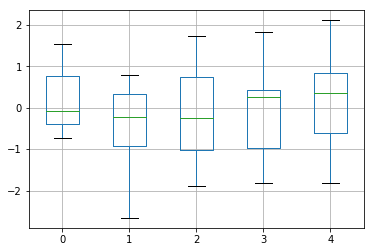

In [95]:
np.random.seed(1500) #generación aleatoria números
dfb = pd.DataFrame(np.random.randn(10,5)) #DataFrame de dimensiones 10x5
dfb.boxplot(return_type='axes') #Grafico de caja de cada categoría.
dfb.head()

<br>
Tomemos los datos del archivo `Automobile_data.csv` para crear un gráfico de caja de 3 variables que definen las dimensiones de los automóviles. 

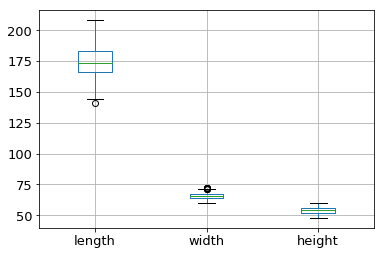

In [97]:
x = df['length'] #Variable Largo
y = df['width'] #Variable Ancho
z =df['height'] #Variable Alto
dfbp = pd.DataFrame([x,y,z]).T #Creando un DataFrame con las dimensiones de los autosmóviles
dfbp.boxplot(fontsize=13, return_type='axes') #Gráfico de caja de las 3 variables 
#Tarea!!!!! Normalice estos datos y haga el nuevo gráfico de caja

<br>
### Gráficos de barras (o histogramas)

<br>
Vamos a generar datos aleatoriamente y hacer un **gráfico de barras**.

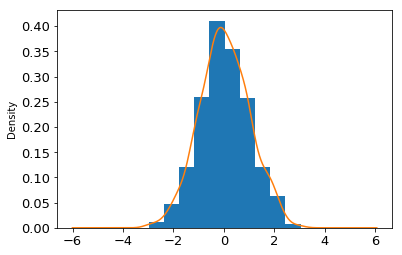

In [98]:
np.random.seed(14000) #Generación de números aleatorios
pdhist = pd.Series(np.random.randn(1000)) #Serie de números aleatorios
pdhist.hist(normed=True) # Muestra las barras
pdhist.plot(fontsize=13, kind='kde') #Gráfico de barras (kde = Kernel Density Estimation plot. Haga la prueba con 'hist')

<br>
Utilicemos los datos de `Automobile_data.csv` para hacer un **gráfico de barras o histograma** de la variable `price` (precio).

Text(0,0.5,'Frecuencia')

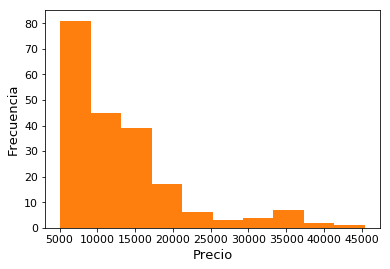

In [99]:
import matplotlib.pyplot as plt
p = df['price'] #Seleccionamos la variable price
pdf = pd.Series(p) #Convertimos la selección en una serie de Pandas
pdf.hist(normed=True) # Muestra las barras
pdf.plot(fontsize=11, kind = 'hist') #Gráfico de barras
plt.xlabel('Precio',fontsize=13)
plt.ylabel('Frecuencia', fontsize=13)

<br>
Este **gráfico de barras** nos indica que hay un número alto de automóviles con precio menor a 10000, entre otras cosas .... ¿Qué cosas? ;)

<br>
### Gráfico de dispersión


<br>
Este **gráfico de dispersión** muestra la relación entre las variables `tamaño del motor` y `precio`.

Text(0,0.5,'Precio')

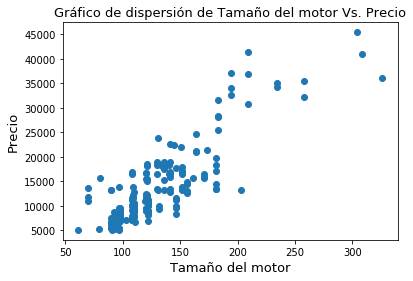

In [102]:
import matplotlib.pyplot as plt
x= df['engine-size'] #Variable predictora
y= df['price'] #Variable objetivo o que deseamos predecir
plt.scatter(x, y) #Gráfico de dispersión en Matplotlib 
plt.title('Gráfico de dispersión de Tamaño del motor Vs. Precio', fontsize=13)#Nombre del gráfico
plt.xlabel('Tamaño del motor', fontsize=13)#Etiquetal del eje-x
plt.ylabel('Precio', fontsize=13)#Etiqueta del eje-y

<br>
### Correlación entre variables

Tomememos las dos variables del ejemplo anterior...

Text(0.5,1,'Gráfico de dispersión de Tamaño del motor Vs. Precio')

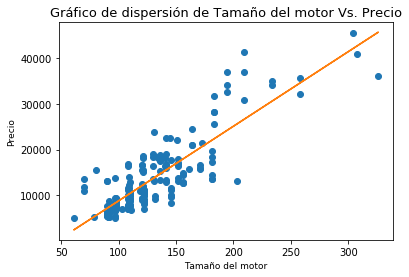

In [119]:
import matplotlib.pyplot as plt
from scipy import stats
x=df['engine-size'] #Variable predictora
y= df['price'] #Variable objetivo o que deseamos predecir
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
plt.plot(x,y,'o', x, line)
ax = plt.gca()
fig = plt.gcf()
plt.xlabel('Tamaño del motor', fontsize=9)#Etiquetal del eje-x
plt.ylabel('Precio', fontsize=9)#Etiqueta del eje-y
plt.title('Gráfico de dispersión de Tamaño del motor Vs. Precio', fontsize=13)#Nombre del gráfico



El gráfico de dispersión anterior revela que hay una relación lineal positiva entre el tamaño del motor y el precio del auto. Es decir, a medida que aumenta el tamaño del motor aumenta el precio.

Este gráfico de dispersión revela que hay una relación lineal negativa entre las millas que recorre el auto por combustible que usa y el precio del mismo. Es decir, mientras más millas por galón el auto es más económico. 

Text(0.5,1,'Gráfico de dispersión de Millas por galón en autopista Vs. Precio')

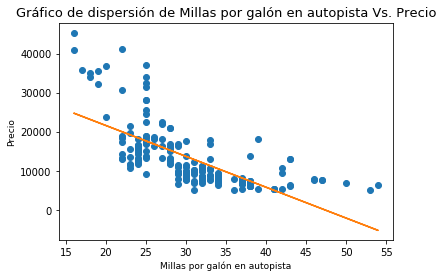

In [121]:
import matplotlib.pyplot as plt
from scipy import stats
x=df['highway-mpg'] #Variable predictora
y= df['price'] #Variable objetivo o que deseamos predecir
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
plt.plot(x,y,'o', x, line)
ax = plt.gca()
fig = plt.gcf()
plt.xlabel('Millas por galón en autopista', fontsize=9)#Etiquetal del eje-x
plt.ylabel('Precio', fontsize=9)#Etiqueta del eje-y
plt.title('Gráfico de dispersión de Millas por galón en autopista Vs. Precio', fontsize=13)#Nombre del gráfico


Ahora calculemos el coeficiente de correlación y el p-valor entre las variables 'Caballos de Fuerza' y 'Precio' usando 'stats.pearson()'

In [118]:
from scipy import stats
stats.pearsonr(df['horsepower'], df['price'])

(0.757916953745141, 1.6076704005409566e-39)

Existe una fuerte correlación positiva entre las variables ya que el coeficiente de correlación es cercano a 1 y el p-valor es mucho menor que 0.001